https://stepik.org/lesson/1370110/step/8

In [ ]:
import numpy as np


# Функции
func = lambda x: 0.1 * x + 0.1 * x ** 2 - 0.5 * np.sin(2*x) + 1 * np.cos(4*x) + 10
# loss = lambda w, x, y: ((x @ w - y)**2 + lm / 2 * w[1:] @ w[1:].T) # не нужна

# Параметры
N = 22  # размер признакового пространства (степень полинома N-1)
lm = 20 # параметр лямбда для L2-регуляризатора

# Данные
x = np.arange(-3.0, 4.1, 0.1) # значения по оси абсцисс (Ox) с шагом 0,1
y = np.array(func(x)) # значения функции по оси ординат
X = np.array([[a ** n for n in range(N)] for a in x])  # матрица входных векторов
IL = np.array([[lm if i == j else 0 for j in range(N)] for i in range(N)])  # матрица lambda*I
IL[0][0] = 0  # первый коэффициент не регуляризуем
X_train = X[::2]  # обучающая выборка (входы)
Y_train = y[::2]  # обучающая выборка (целевые значения)

# Аналитически находим веса по формуле w_∗​=(X^T⋅X+λ⋅I)^{−1}⋅X^T⋅Y:
w = np.linalg.inv(X_train.T @ X_train + IL) @ X_train.T @ Y_train
pred = X @ w # для графика
Q = ((X @ w - y)**2).mean()
Q

1.4878945690962966

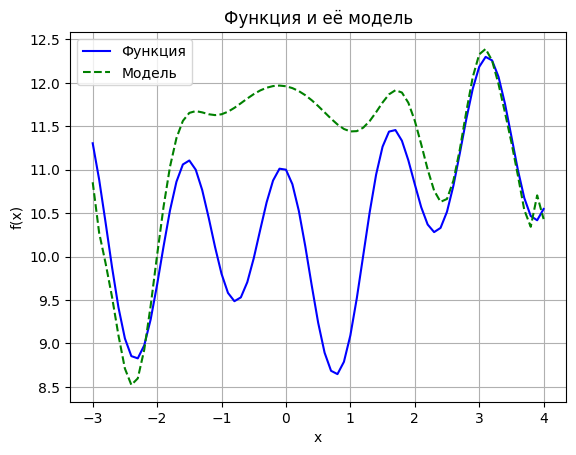

In [ ]:
# Создание графика
import matplotlib.pyplot as plt


plt.plot(x, y, label='Функция', color='blue')
plt.plot(x, pred, label='Модель', color='green', ls='--')
plt.title('Функция и её модель')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()
